<a href="https://www.kaggle.com/code/thekazisakib/decode-digits-ml-image-analysis?scriptVersionId=157804387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Task:** 

The task is to build a machine learning model that can correctly identify the digit (0 through 9) represented in a given image.

# Import Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

# Data Exploration:

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
# Load the data

train_data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check the null and missing data
train_data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

there is no missing values in the train_data and test_data dataset. So we can safely go ahead.

# Data Preprocessing

In [7]:
X = train_data.drop('label', axis=1)  # Features
y = train_data['label']  # Labels

### Normalization

In [8]:
# Normalize pixel values to a range between 0 and 1
X = X / 255.0

### Reshape

In [9]:
# Reshape data to 28x28 images (height = 28px, width = 28px , canal = 1)
X = X.values.reshape(-1, 28, 28, 1)

# Visualization

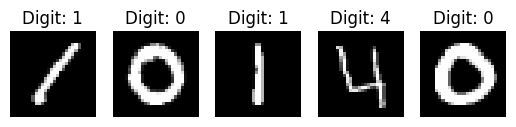

In [10]:
# Visualize the first 5 images
num_images_to_visualize = 5
for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Digit: {y[i]}")
    plt.axis('off')

plt.show()

### Label Encoding

In [11]:
# Convert labels to one-hot encoding
y = pd.get_dummies(y)

In [12]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# CNN

In [13]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.2062 - accuracy: 0.9388 - val_loss: 0.1087 - val_accuracy: 0.9665
Epoch 2/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0677 - val_accuracy: 0.9793
Epoch 3/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0634 - val_accuracy: 0.9799
Epoch 4/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.0663 - val_accuracy: 0.9786
Epoch 5/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0552 - val_accuracy: 0.9836
Epoch 6/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0683 - val_accuracy: 0.9812
Epoch 7/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0618 -

# Prediction

In [15]:
# Make predictions on the test set
X_test = test_data / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 4s 5ms/step


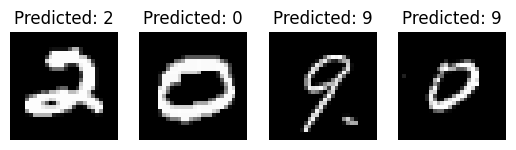

In [16]:
# Visualize the first 4 test images and their predicted labels
num_images_to_visualize = 4
for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')

plt.show()

In [17]:
# Create a submission file
submission = pd.DataFrame({'ImageId': range(1, len(test_data) + 1), 'Label': predicted_labels})
submission.to_csv('submission.csv', index=False)